In [1]:
# needed for processing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

#needed for openai gym environment
import gym
import gym_anytrading

#needed for reinforcement learning algorithms
from stable_baselines3.common.vec_env import DummyVecEnv

from stable_baselines3 import A2C
from stable_baselines3 import DQN
from stable_baselines3 import PPO


In [2]:
googl_df = pd.read_csv('GOOGL.csv')
googl_df = googl_df.drop(columns=['Dividends', 'Stock Splits'])

In [3]:
googl_df['N_date'] = googl_df['Date'].str[:10]
googl_df['N_date'] = pd.to_datetime(googl_df['N_date'])
googl_df = googl_df.drop(columns=['Date'])

In [4]:
googl_df

,Open,High,Low,Close,Volume,N_date
0,2.502503,2.604104,2.401401,2.511011,893181924,2004-08-19
1,2.527778,2.729730,2.515015,2.710460,456686856,2004-08-20
2,2.771522,2.839840,2.728979,2.737738,365122512,2004-08-23
3,2.783784,2.792793,2.591842,2.624374,304946748,2004-08-24
4,2.626627,2.702703,2.599600,2.652653,183772044,2004-08-25
...,...,...,...,...,...,...
4705,107.040001,107.349998,105.089996,107.339996,36139800,2023-04-28
4706,106.839996,107.989998,106.820000,107.199997,26681700,2023-05-01
4707,107.139999,107.199997,103.709999,105.320000,30997200,2023-05-02
4708,105.529999,107.489998,104.959999,105.410004,21795400,2023-05-03


In [5]:
googl_df.dtypes

Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
N_date    datetime64[ns]
dtype: object

In [6]:
googl_df['Year'] = googl_df['N_date'].dt.year

In [7]:
googl_df

,Open,High,Low,Close,Volume,N_date,Year
0,2.502503,2.604104,2.401401,2.511011,893181924,2004-08-19,2004
1,2.527778,2.729730,2.515015,2.710460,456686856,2004-08-20,2004
2,2.771522,2.839840,2.728979,2.737738,365122512,2004-08-23,2004
3,2.783784,2.792793,2.591842,2.624374,304946748,2004-08-24,2004
4,2.626627,2.702703,2.599600,2.652653,183772044,2004-08-25,2004
...,...,...,...,...,...,...,...
4705,107.040001,107.349998,105.089996,107.339996,36139800,2023-04-28,2023
4706,106.839996,107.989998,106.820000,107.199997,26681700,2023-05-01,2023
4707,107.139999,107.199997,103.709999,105.320000,30997200,2023-05-02,2023
4708,105.529999,107.489998,104.959999,105.410004,21795400,2023-05-03,2023


In [8]:
googl_df.dtypes

Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
N_date    datetime64[ns]
Year               int64
dtype: object

In [9]:
financial_crisis = [2007,2008,2009]
googl_df_crisis = googl_df[googl_df['Year'].isin(financial_crisis)]





In [10]:
crisis_env = gym.make('stocks-v0', df=googl_df_crisis, frame_bound=(50,650), window_size=10)

info {'total_reward': 2.5280241966247674, 'total_profit': 0.1323395496183045, 'position': 0}


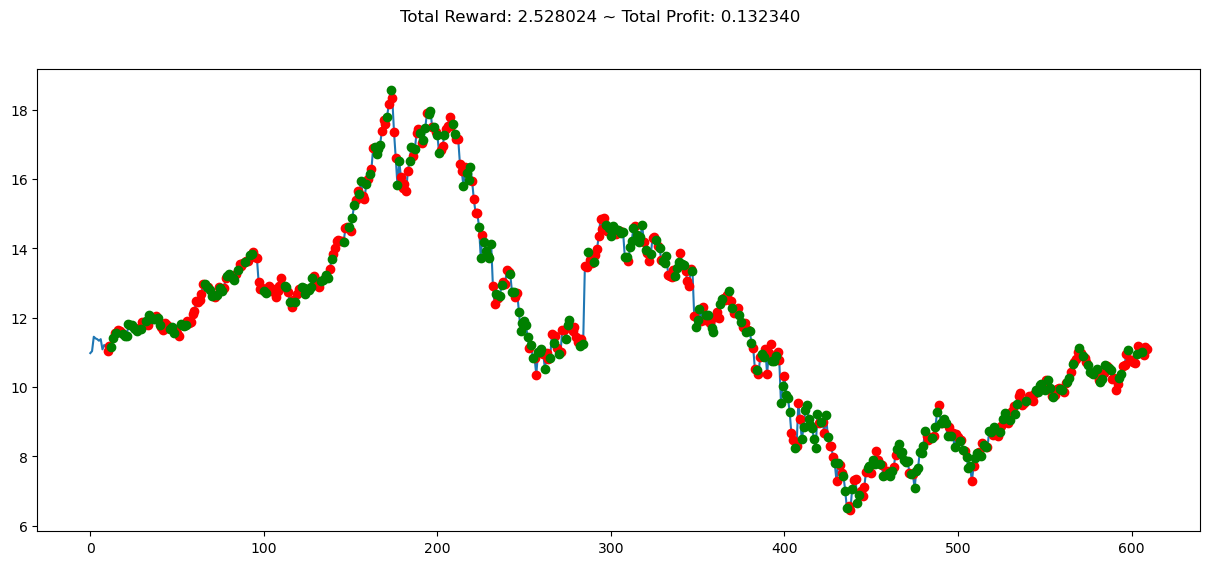

In [11]:
state = crisis_env.reset() #getting initial state
# loop through each step we take a random action
while True:
    # randomly buy or sell
    action = crisis_env.action_space.sample()
    n_state, reward, done, info = crisis_env.step(action)
    if done:
        print("info", info)
        break
FC_random = info['total_profit']
plt.figure(figsize=(15,6))
plt.cla()
crisis_env.render_all()
plt.show()

In [12]:
googl_maker = lambda: gym.make('stocks-v0', df=googl_df_crisis, frame_bound=(50,650), window_size=10)
# can try this with other types of enivornment not just the DummyVec
googl_env = DummyVecEnv([googl_maker])

In [13]:
dqn_model = DQN('MlpPolicy', googl_env, verbose=1)
dqn_model.learn(total_timesteps=25000)

Using cpu device
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.0895   |
| time/               |          |
|    episodes         | 4        |
|    fps              | 7573     |
|    time_elapsed     | 0        |
|    total_timesteps  | 2396     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 7604     |
|    time_elapsed     | 0        |
|    total_timesteps  | 4792     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12       |
|    fps              | 7868     |
|    time_elapsed     | 0        |
|    total_timesteps  | 7188     |
----------------------------------
----------------------------------
| r

info {'total_reward': 1.6466474533081055, 'total_profit': 1.1061295882884052, 'position': 0}


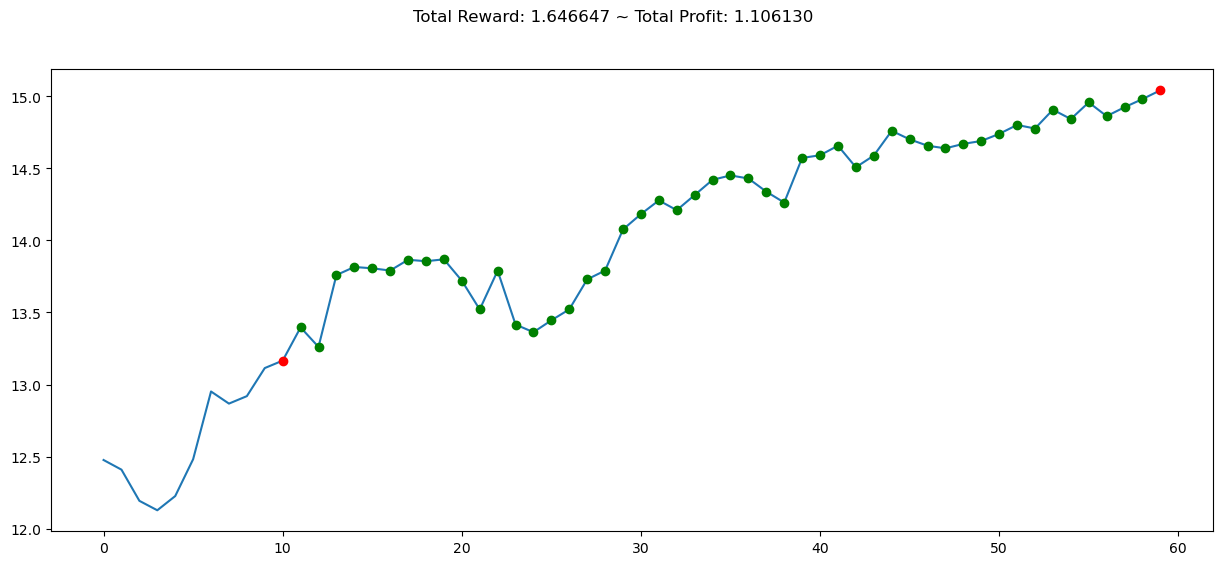

In [14]:
googl_env = gym.make('stocks-v0', df=googl_df_crisis, frame_bound=(700,750), window_size=10)
obs = googl_env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = dqn_model.predict(obs)
    obs,rewards, done, info = googl_env.step(action)
    if done:
        print('info', info)
        break
FC_dqn = info['total_profit']
plt.figure(figsize=(15,6))
plt.cla()
googl_env.render_all()
plt.show()

In [15]:
a2c_model = A2C('MlpPolicy', googl_env, verbose=1)
a2c_model.learn(total_timesteps=25000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 49       |
|    ep_rew_mean        | 0.756    |
| time/                 |          |
|    fps                | 741      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.659   |
|    explained_variance | -0.0143  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.309    |
|    value_loss         | 0.226    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 49       |
|    ep_rew_mean        | 0.983    |
| time/                 |          |
|    fps                | 748      |
|    iterations         | 200      |
|    time_elapsed 

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 49       |
|    ep_rew_mean        | 0.847    |
| time/                 |          |
|    fps                | 761      |
|    iterations         | 1400     |
|    time_elapsed       | 9        |
|    total_timesteps    | 7000     |
| train/                |          |
|    entropy_loss       | -0.691   |
|    explained_variance | -0.00713 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1399     |
|    policy_loss        | 0.000156 |
|    value_loss         | 0.000797 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 49       |
|    ep_rew_mean        | 0.857    |
| time/                 |          |
|    fps                | 761      |
|    iterations         | 1500     |
|    time_elapsed       | 9        |
|    total_timesteps    | 7500     |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 49       |
|    ep_rew_mean        | 0.811    |
| time/                 |          |
|    fps                | 739      |
|    iterations         | 2800     |
|    time_elapsed       | 18       |
|    total_timesteps    | 14000    |
| train/                |          |
|    entropy_loss       | -0.688   |
|    explained_variance | 0.0227   |
|    learning_rate      | 0.0007   |
|    n_updates          | 2799     |
|    policy_loss        | -0.0839  |
|    value_loss         | 0.021    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 49       |
|    ep_rew_mean        | 0.784    |
| time/                 |          |
|    fps                | 740      |
|    iterations         | 2900     |
|    time_elapsed       | 19       |
|    total_timesteps    | 14500    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 49       |
|    ep_rew_mean        | 0.723    |
| time/                 |          |
|    fps                | 735      |
|    iterations         | 4200     |
|    time_elapsed       | 28       |
|    total_timesteps    | 21000    |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | 0.00839  |
|    learning_rate      | 0.0007   |
|    n_updates          | 4199     |
|    policy_loss        | 0.177    |
|    value_loss         | 0.166    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 49       |
|    ep_rew_mean        | 0.713    |
| time/                 |          |
|    fps                | 736      |
|    iterations         | 4300     |
|    time_elapsed       | 29       |
|    total_timesteps    | 21500    |
| train/                |          |
|

info {'total_reward': 1.261762619018553, 'total_profit': 1.1008316781411434, 'position': 1}


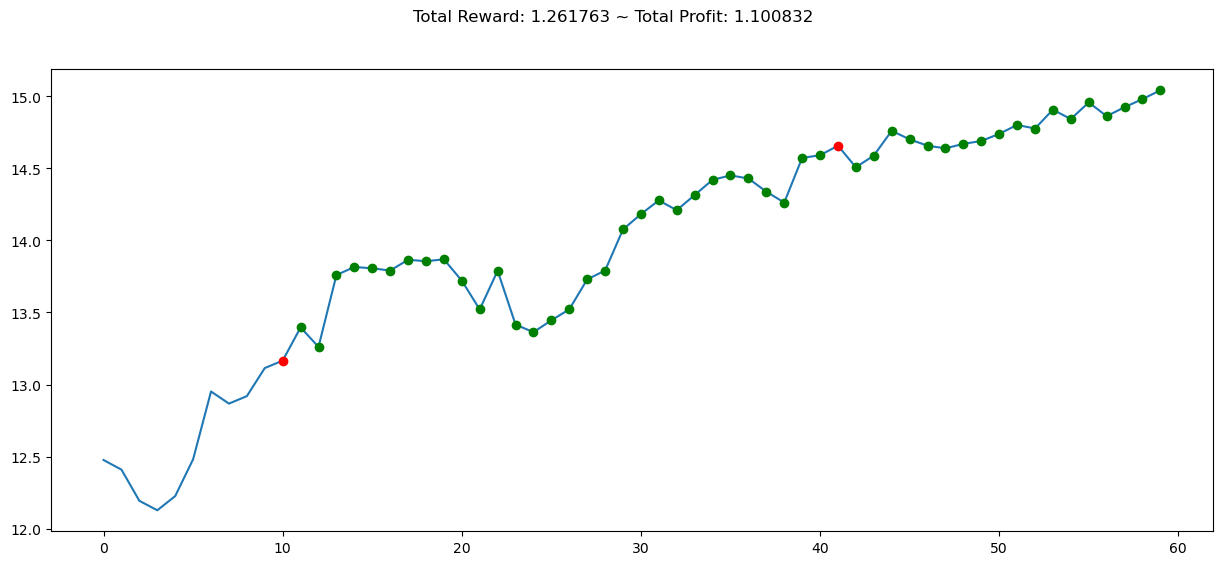

In [16]:
googl_env = gym.make('stocks-v0', df=googl_df_crisis, frame_bound=(700,750), window_size=10)
obs = googl_env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = dqn_model.predict(obs)
    obs,rewards, done, info = googl_env.step(action)
    if done:
        print('info', info)
        break
FC_a2c = info['total_profit']
plt.figure(figsize=(15,6))
plt.cla()
googl_env.render_all()
plt.show()

In [17]:
ppo_model = PPO('MlpPolicy', googl_env, verbose=1)
ppo_model.learn(total_timesteps=25000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 49       |
|    ep_rew_mean     | 0.821    |
| time/              |          |
|    fps             | 1660     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 49          |
|    ep_rew_mean          | 0.912       |
| time/                   |             |
|    fps                  | 1123        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.018338364 |
|    clip_fraction        | 0.133       |
|    clip_range           | 0.2         |
|    entropy_loss   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 49           |
|    ep_rew_mean          | 1.42         |
| time/                   |              |
|    fps                  | 839          |
|    iterations           | 11           |
|    time_elapsed         | 26           |
|    total_timesteps      | 22528        |
| train/                  |              |
|    approx_kl            | 0.0038759927 |
|    clip_fraction        | 0.0645       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.52        |
|    explained_variance   | 0.662        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.0365       |
|    n_updates            | 100          |
|    policy_gradient_loss | -0.00366     |
|    value_loss           | 0.058        |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

info {'total_reward': 0.9426937103271502, 'total_profit': 1.0953854669497907, 'position': 1}


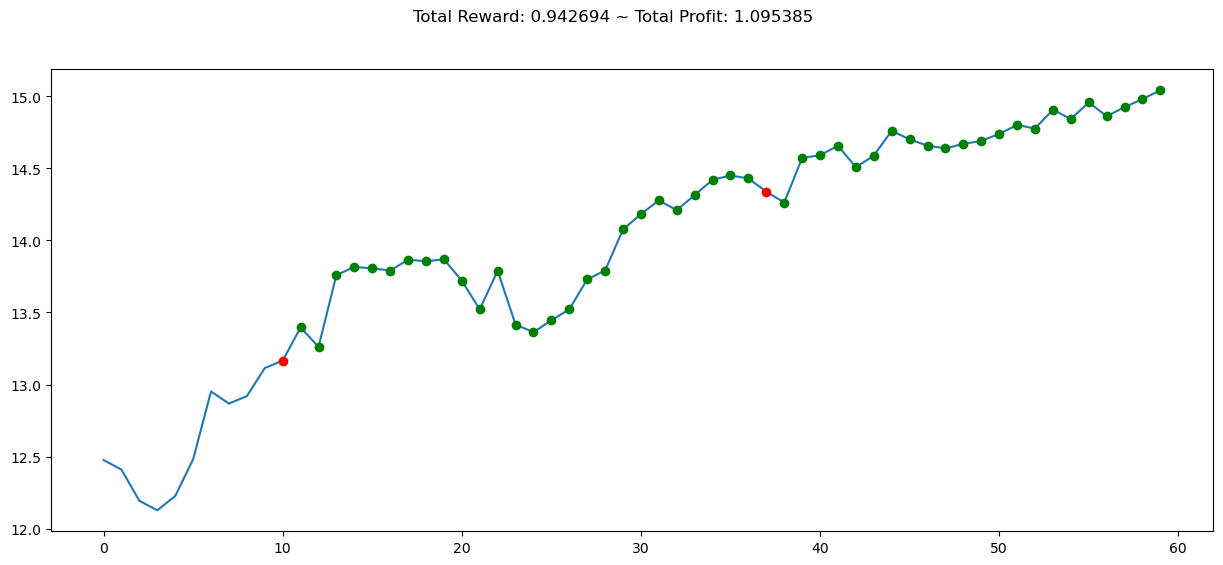

In [18]:
googl_env = gym.make('stocks-v0', df=googl_df_crisis, frame_bound=(700,750), window_size=10)
obs = googl_env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = dqn_model.predict(obs)
    obs,rewards, done, info = googl_env.step(action)
    if done:
        print('info', info)
        break
FC_ppo = info['total_profit']
plt.figure(figsize=(15,6))
plt.cla()
googl_env.render_all()
plt.show()

In [19]:
pandemic_year_list = [2020,2021,2022]
googl_df_pandemic = googl_df[googl_df['Year'].isin(pandemic_year_list)]

In [20]:
pandemic_env = gym.make('stocks-v0', df=googl_df_pandemic, frame_bound=(50,650), window_size=10)

info {'total_reward': 40.16996765136711, 'total_profit': 0.1556496633731462, 'position': 0}


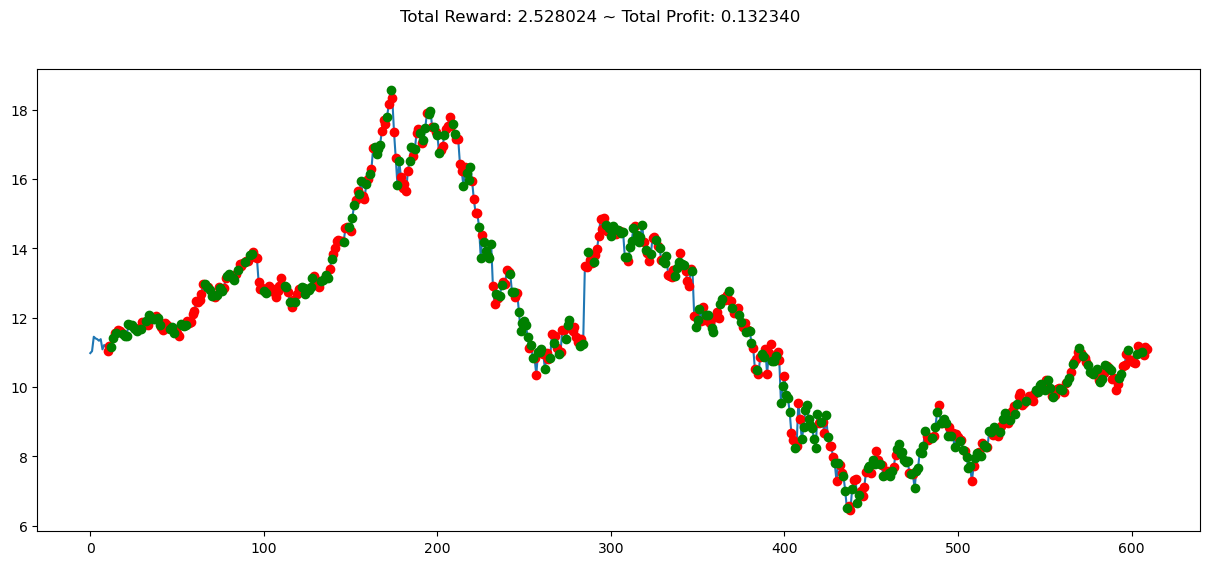

In [21]:
state = pandemic_env.reset() #getting initial state
# loop through each step we take a random action
while True:
    # randomly buy or sell
    action = pandemic_env.action_space.sample()
    n_state, reward, done, info = pandemic_env.step(action)
    if done:
        print("info", info)
        break
pan_random = info['total_profit']
plt.figure(figsize=(15,6))
plt.cla()
crisis_env.render_all()
plt.show()

In [22]:
googl_maker = lambda: gym.make('stocks-v0', df=googl_df_pandemic, frame_bound=(50,650), window_size=10)
# can try this with other types of enivornment not just the DummyVec
googl_env = DummyVecEnv([googl_maker])

In [23]:
googl_env

In [24]:
dqn_model = DQN('MlpPolicy', googl_env, verbose=1)
dqn_model.learn(total_timesteps=25000)

Using cpu device
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.0895   |
| time/               |          |
|    episodes         | 4        |
|    fps              | 11006    |
|    time_elapsed     | 0        |
|    total_timesteps  | 2396     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 10751    |
|    time_elapsed     | 0        |
|    total_timesteps  | 4792     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12       |
|    fps              | 10785    |
|    time_elapsed     | 0        |
|    total_timesteps  | 7188     |
----------------------------------
----------------------------------
| r

info {'total_reward': -0.4199981689453125, 'total_profit': 0.9150621661774413, 'position': 1}


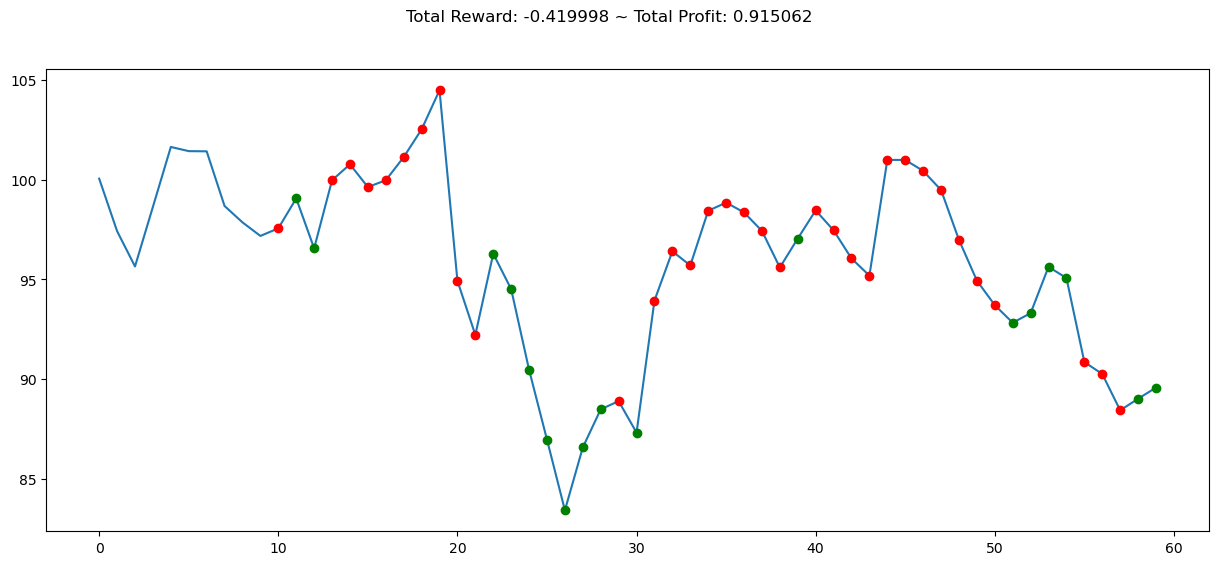

In [25]:
googl_env = gym.make('stocks-v0', df=googl_df_pandemic, frame_bound=(700,750), window_size=10)
obs = googl_env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = dqn_model.predict(obs)
    obs,rewards, done, info = googl_env.step(action)
    if done:
        print('info', info)
        break
pan_dqn = info['total_profit']
plt.figure(figsize=(15,6))
plt.cla()
googl_env.render_all()
plt.show()

In [26]:
googl_env

<OrderEnforcing<StocksEnv<stocks-v0>>>

In [27]:
a2c_model = A2C('MlpPolicy', googl_env, verbose=1)
a2c_model.learn(total_timesteps=25000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 49       |
|    ep_rew_mean        | 2.11     |
| time/                 |          |
|    fps                | 749      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.691   |
|    explained_variance | 6.38e-06 |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.715   |
|    value_loss         | 2.57     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 49       |
|    ep_rew_mean        | 0.0205   |
| time/                 |          |
|    fps                | 762      |
|    iterations         | 200      |
|    time_elapsed 

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 49       |
|    ep_rew_mean        | -2.7     |
| time/                 |          |
|    fps                | 721      |
|    iterations         | 1400     |
|    time_elapsed       | 9        |
|    total_timesteps    | 7000     |
| train/                |          |
|    entropy_loss       | -0.00977 |
|    explained_variance | -0.00321 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1399     |
|    policy_loss        | 1.62e-08 |
|    value_loss         | 1.98e-10 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 49       |
|    ep_rew_mean        | -2.21    |
| time/                 |          |
|    fps                | 724      |
|    iterations         | 1500     |
|    time_elapsed       | 10       |
|    total_timesteps    | 7500     |
| train/                |          |
|

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 49        |
|    ep_rew_mean        | -0.261    |
| time/                 |           |
|    fps                | 744       |
|    iterations         | 2700      |
|    time_elapsed       | 18        |
|    total_timesteps    | 13500     |
| train/                |           |
|    entropy_loss       | -0.0121   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 2699      |
|    policy_loss        | -2.21e-09 |
|    value_loss         | 2.4e-12   |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 49       |
|    ep_rew_mean        | -0.102   |
| time/                 |          |
|    fps                | 745      |
|    iterations         | 2800     |
|    time_elapsed       | 18       |
|    total_timesteps    | 14000    |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 49       |
|    ep_rew_mean        | -0.0891  |
| time/                 |          |
|    fps                | 733      |
|    iterations         | 4000     |
|    time_elapsed       | 27       |
|    total_timesteps    | 20000    |
| train/                |          |
|    entropy_loss       | -0.003   |
|    explained_variance | 0.00232  |
|    learning_rate      | 0.0007   |
|    n_updates          | 3999     |
|    policy_loss        | -1.2e-09 |
|    value_loss         | 3.01e-11 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 49        |
|    ep_rew_mean        | -0.0891   |
| time/                 |           |
|    fps                | 734       |
|    iterations         | 4100      |
|    time_elapsed       | 27        |
|    total_timesteps    | 20500     |
| train/                |    

info {'total_reward': 0.0, 'total_profit': 0.890781172808794, 'position': 1}


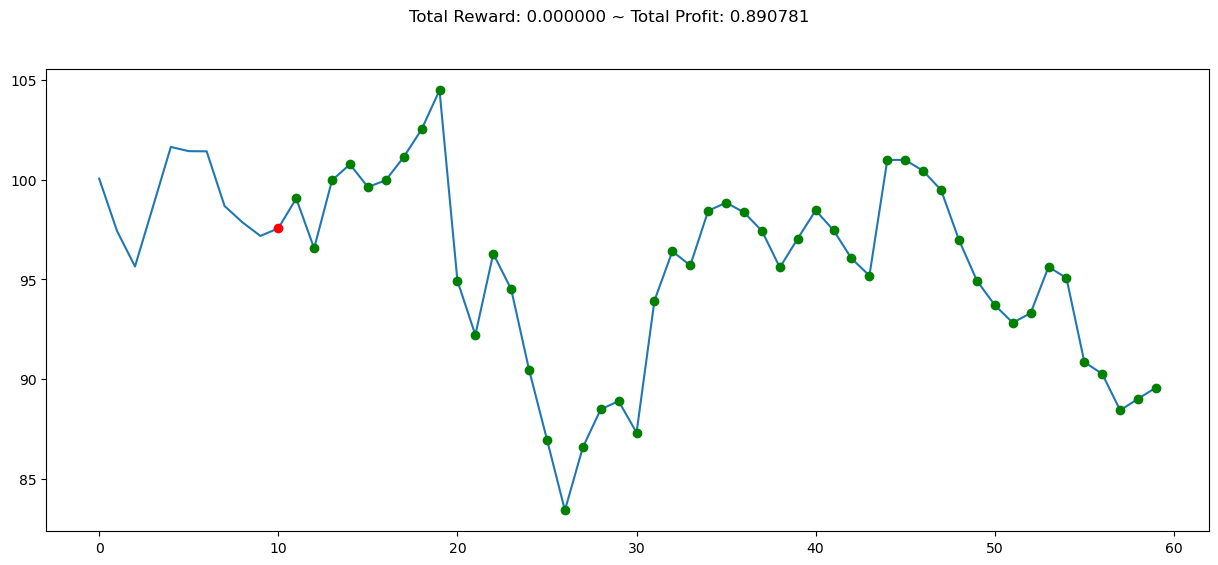

In [28]:
googl_env = gym.make('stocks-v0', df=googl_df_pandemic, frame_bound=(700,750), window_size=10)
obs = googl_env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = a2c_model.predict(obs)
    obs,rewards, done, info = googl_env.step(action)
    if done:
        print('info', info)
        break
pan_a2c = info['total_profit']
plt.figure(figsize=(15,6))
plt.cla()
googl_env.render_all()
plt.show()

In [29]:
googl_env

<OrderEnforcing<StocksEnv<stocks-v0>>>

In [30]:
ppo_model = PPO('MlpPolicy', googl_env, verbose=1)
ppo_model.learn(total_timesteps=25000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 49       |
|    ep_rew_mean     | -5.72    |
| time/              |          |
|    fps             | 1686     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 49          |
|    ep_rew_mean          | -4.53       |
| time/                   |             |
|    fps                  | 938         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.005080455 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 49          |
|    ep_rew_mean          | 21.5        |
| time/                   |             |
|    fps                  | 824         |
|    iterations           | 11          |
|    time_elapsed         | 27          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.006106332 |
|    clip_fraction        | 0.0621      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.389      |
|    explained_variance   | 0.255       |
|    learning_rate        | 0.0003      |
|    loss                 | 17.5        |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.00294    |
|    value_loss           | 32.7        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 49  

info {'total_reward': 28.76000213623044, 'total_profit': 1.1345434595762252, 'position': 0}


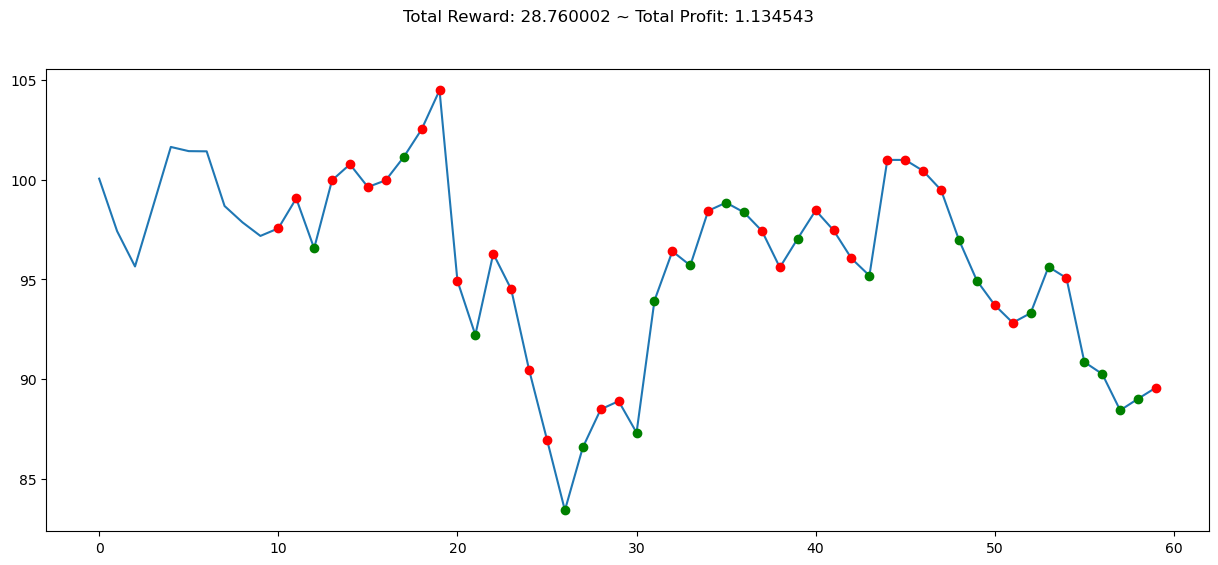

In [31]:
googl_env = gym.make('stocks-v0', df=googl_df_pandemic, frame_bound=(700,750), window_size=10)
obs = googl_env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = ppo_model.predict(obs)
    obs,rewards, done, info = googl_env.step(action)
    if done:
        print('info', info)
        break
pan_ppo = info['total_profit']
plt.figure(figsize=(15,6))
plt.cla()
googl_env.render_all()
plt.show()

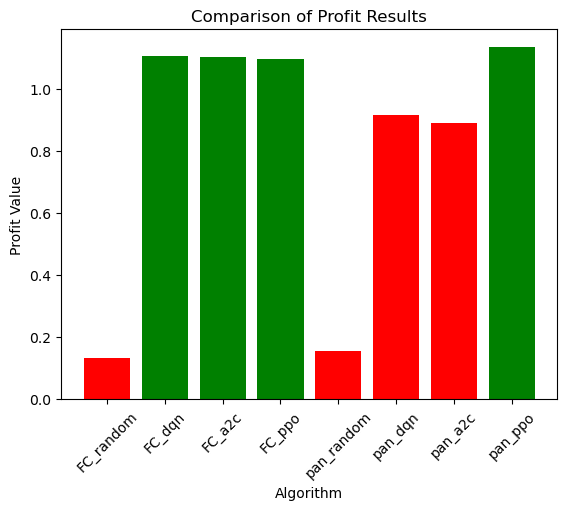

In [32]:
# visualise results
x = ['FC_random', 'FC_dqn', 'FC_a2c', 'FC_ppo', 'pan_random', 'pan_dqn', 'pan_a2c', 'pan_ppo']
y = [FC_random, FC_dqn, FC_a2c, FC_ppo, pan_random, pan_dqn, pan_a2c, pan_ppo]
colors = ['green' if result > 1 else 'red' for result in y ]
plt.bar(x, y, color=colors)
plt.title('Comparison of Profit Results')
plt.xlabel('Algorithm')
plt.xticks(rotation=45)
plt.ylabel('Profit Value')
plt.show()